In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv('/content/Airline_passenger_satisfaction_Data.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.shape

(129880, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [6]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [7]:
df['Arrival Delay'].fillna(df['Arrival Delay'].median(),inplace=True)

In [8]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


In [9]:
df.nunique()

,0
ID,129880
Gender,2
Age,75
Customer Type,2
Type of Travel,2
Class,3
Flight Distance,6848
Departure Delay,466
Arrival Delay,472
Departure and Arrival Time Convenience,6


In [10]:
print(df['Flight Distance'].unique())

['821' '853' '1905' ... 1161 1051 1376]


In [11]:
print(df['Flight Distance'].nunique())

6848


In [12]:
df['Flight Distance'] = df['Flight Distance'].astype(str).str.replace(',', '').str.replace(' ', '')

In [13]:
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
df['Flight Distance'].fillna(df['Flight Distance'].median(),inplace=True)
df['Flight Distance'] = df['Flight Distance'].astype('int64')
print(df['Flight Distance'].dtype)

int64


In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop_duplicates()

In [16]:
print(df.duplicated().sum())

0


In [17]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.304250,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.423257,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [19]:
df=df.drop(['ID'],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [21]:
df['Flight Distance'].isna().sum()


0

In [22]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [23]:
categorical_features,non_categorical_features,discrete_features,continuous_features =  classify_features(df)

In [24]:
print('Categorical_Features: ',categorical_features)
print('\nNon_Categorical_Features: ',non_categorical_features)
print('\nDiscrete_Features: ',discrete_features)
print('\nContinuous_Features: ',continuous_features)

Categorical_Features:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

Non_Categorical_Features:  []

Discrete_Features:  ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

Continuous_Features:  ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']


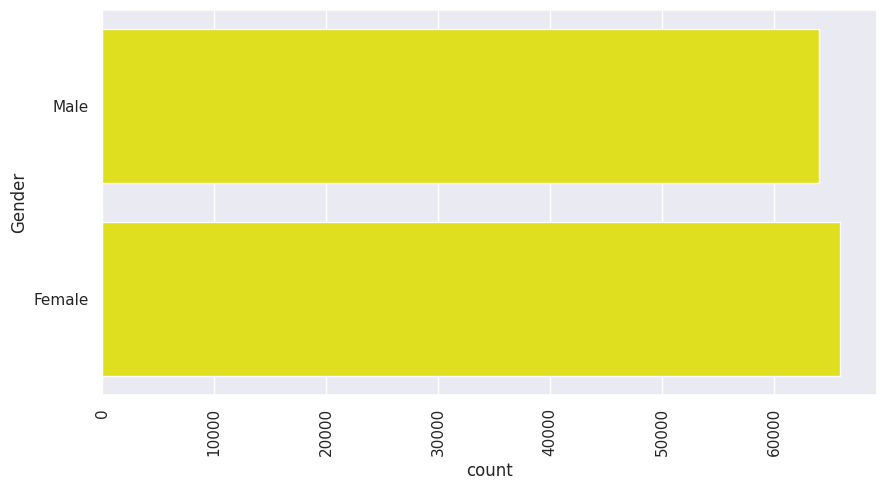

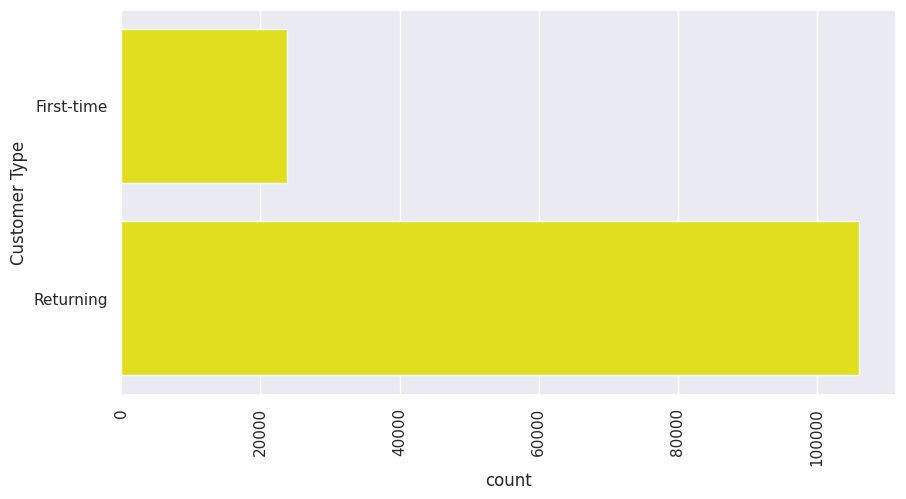

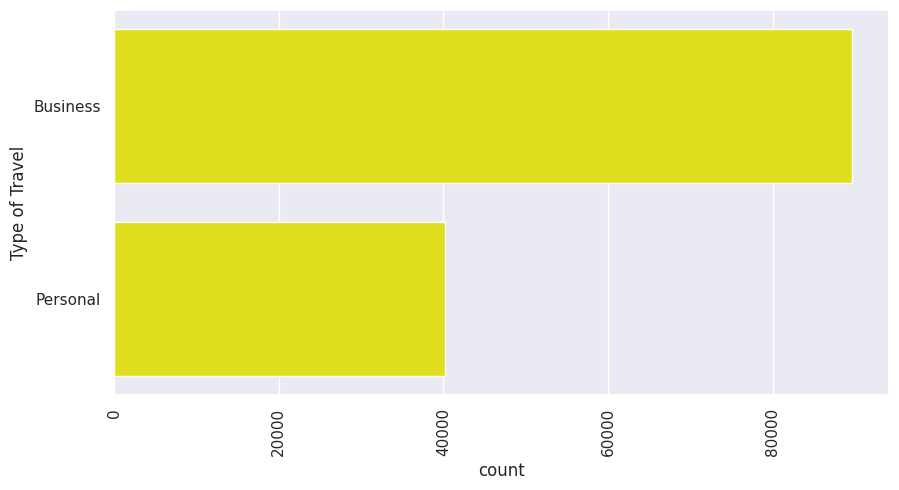

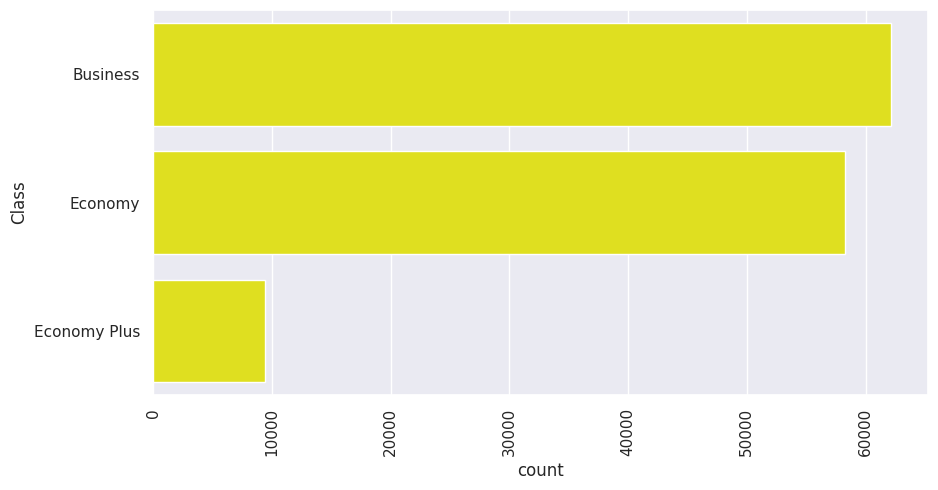

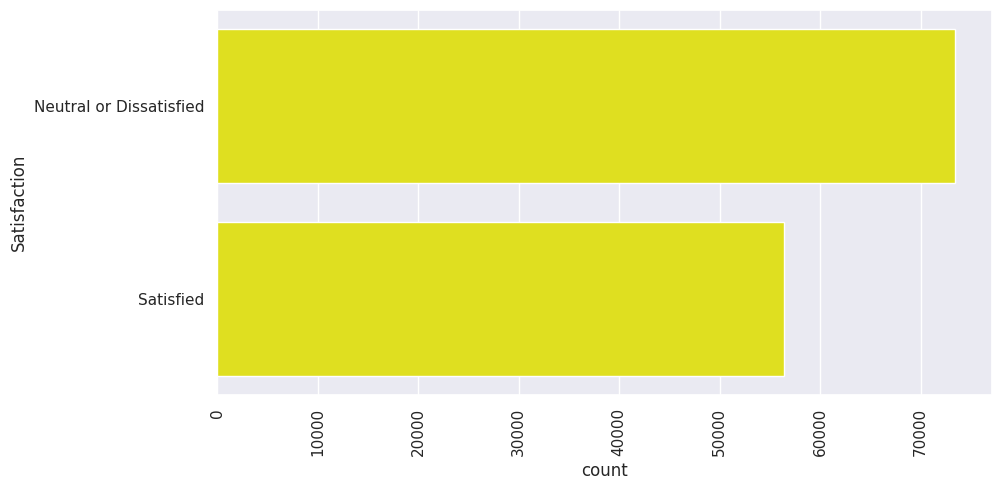

In [25]:
for i in categorical_features:
  plt.figure(figsize=(10,5))
  sns.countplot(df[i],color='yellow')
  plt.xticks(rotation=90)
  plt.show()

In [26]:
import plotly.express as px

for i in categorical_features:
  counts = df[i].value_counts()
  fig = px.pie(counts,values=counts.values,names=counts.index,title=f"Distribution of{i}",
               color_discrete_sequence=['#FECB52', '#B6E880', '#FF97FF'])
  fig.show()

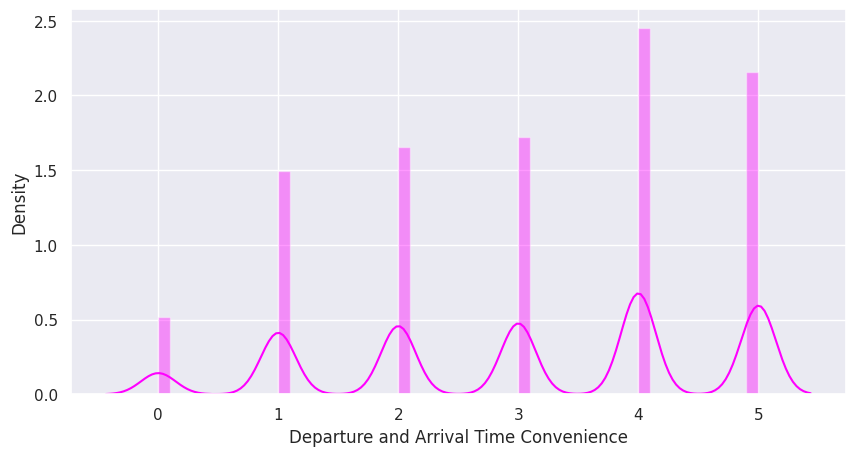

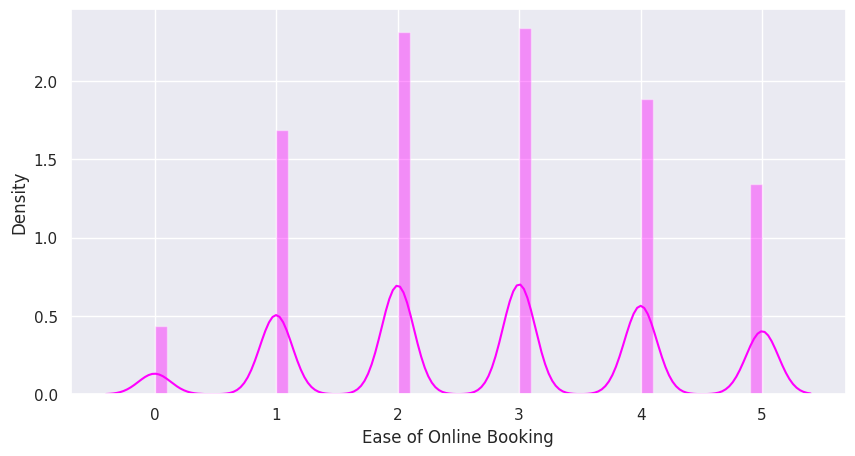

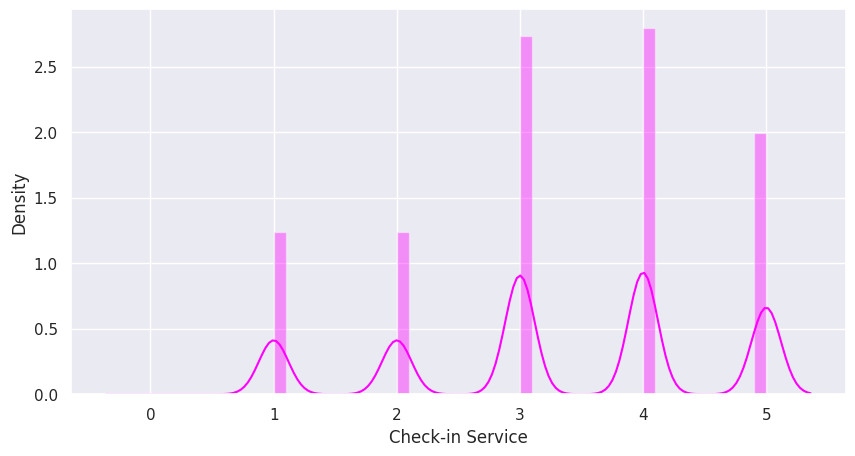

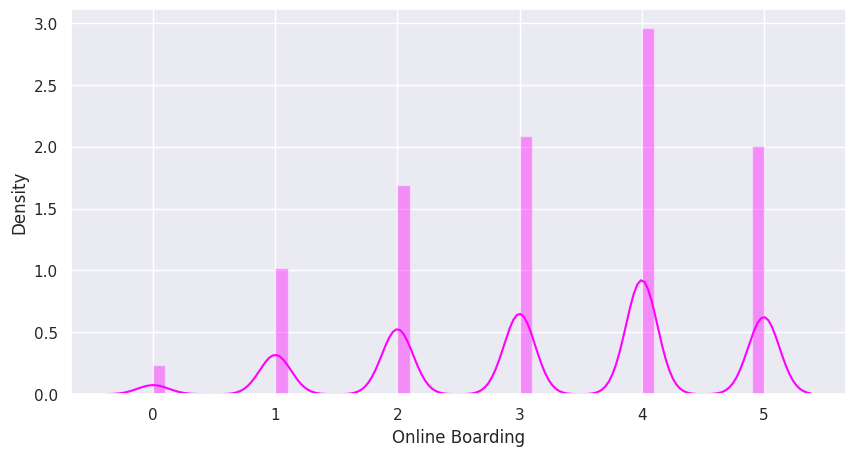

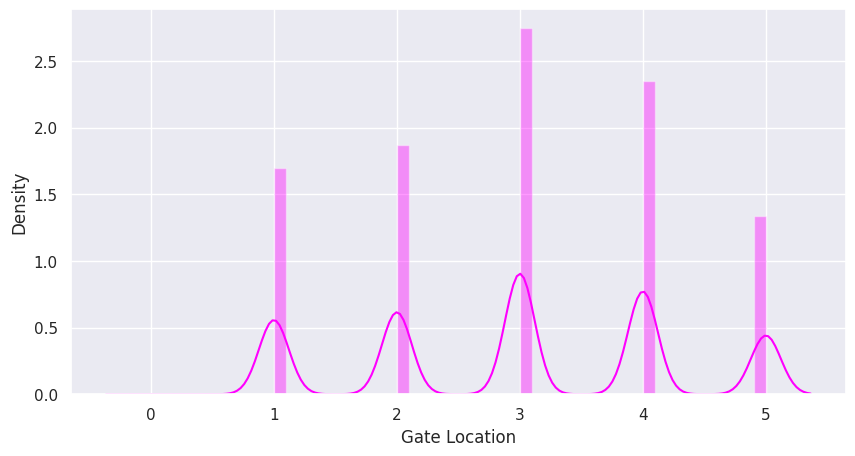

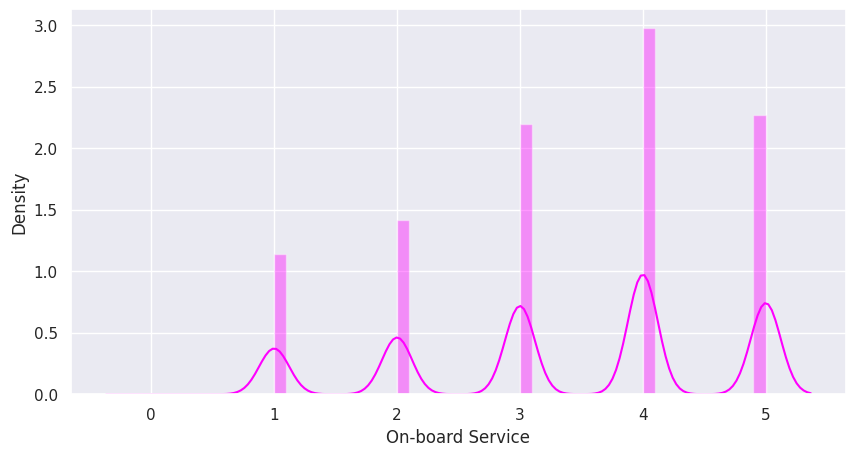

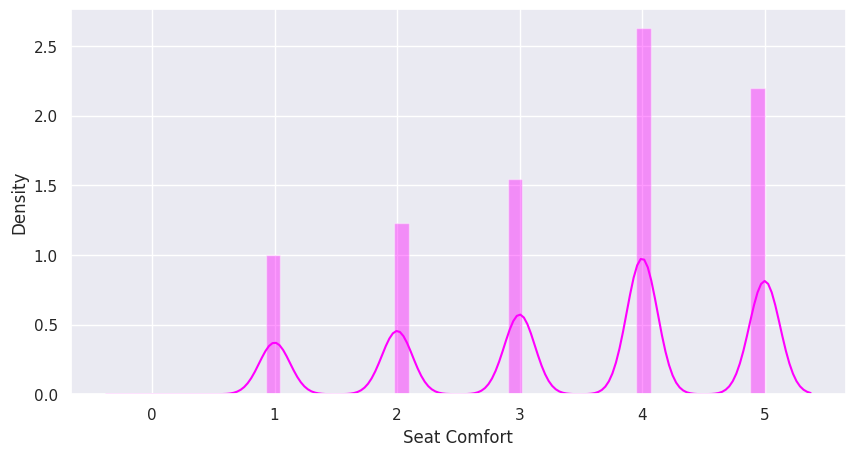

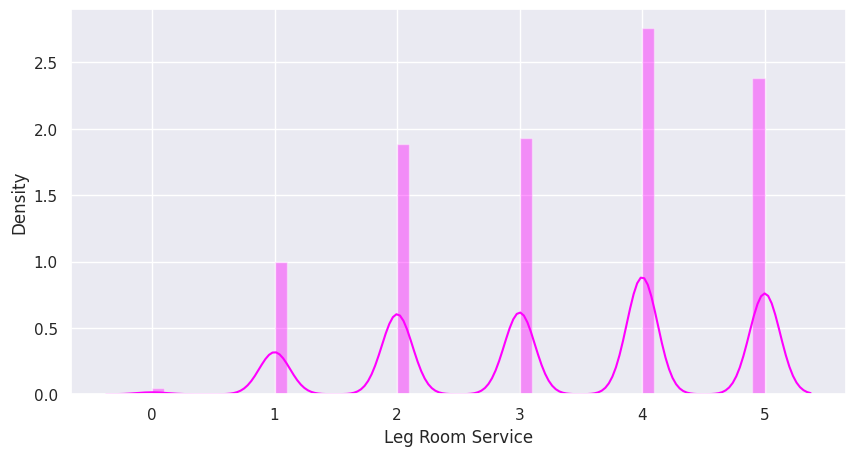

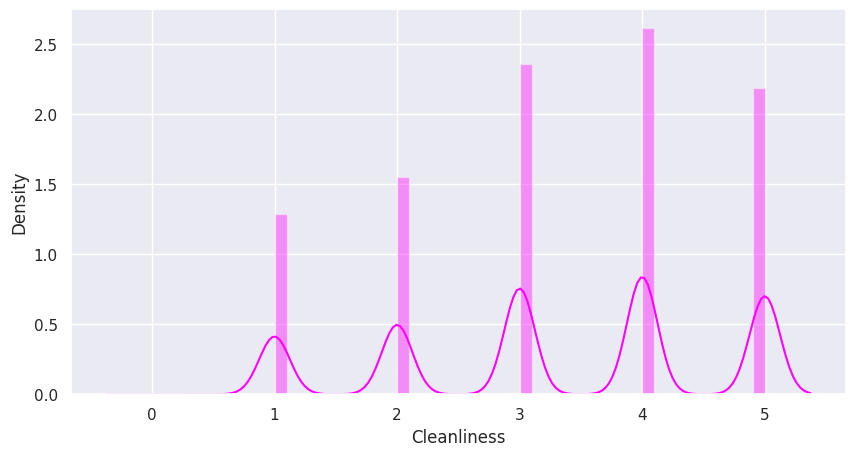

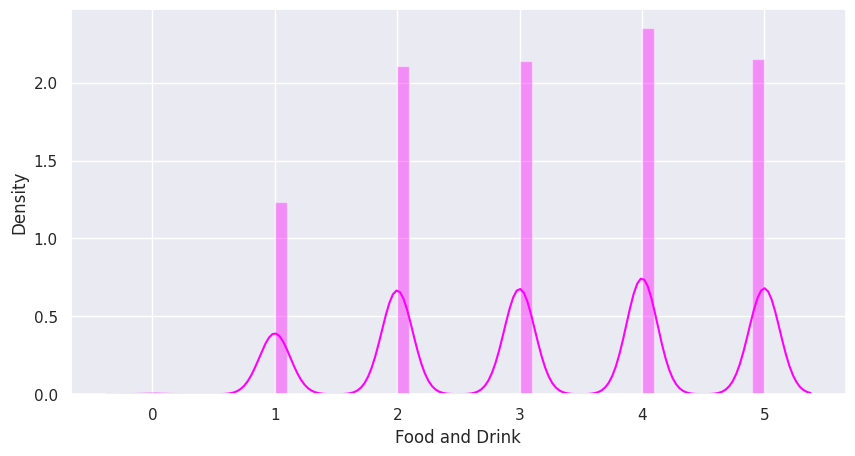

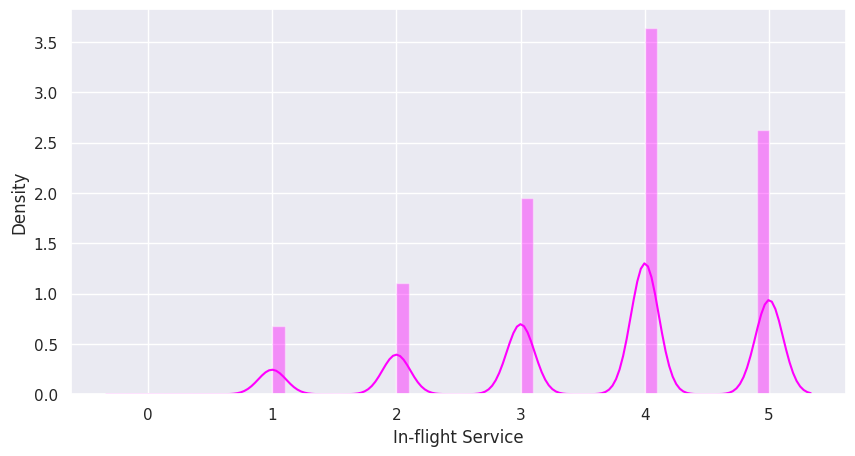

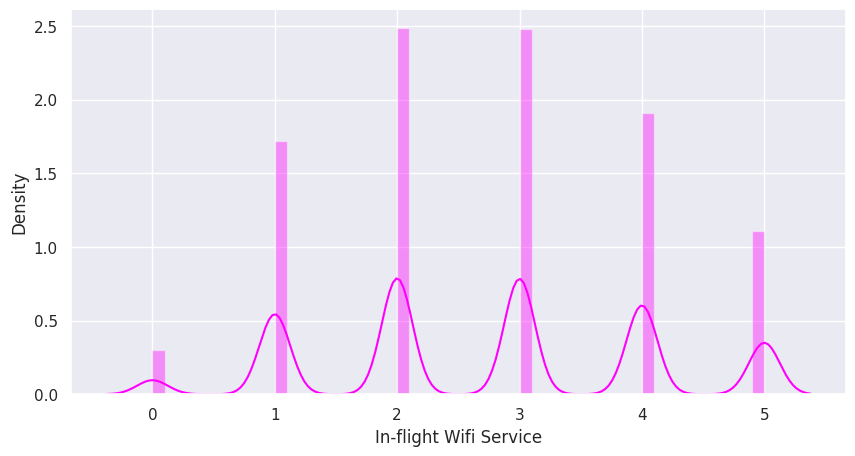

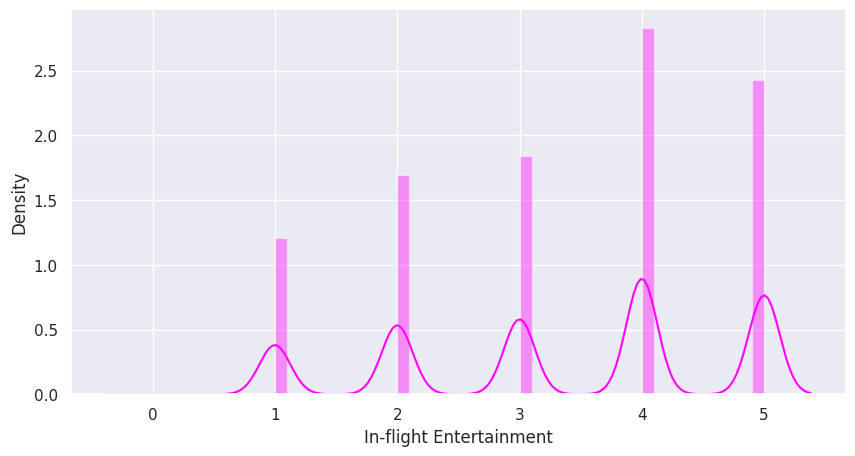

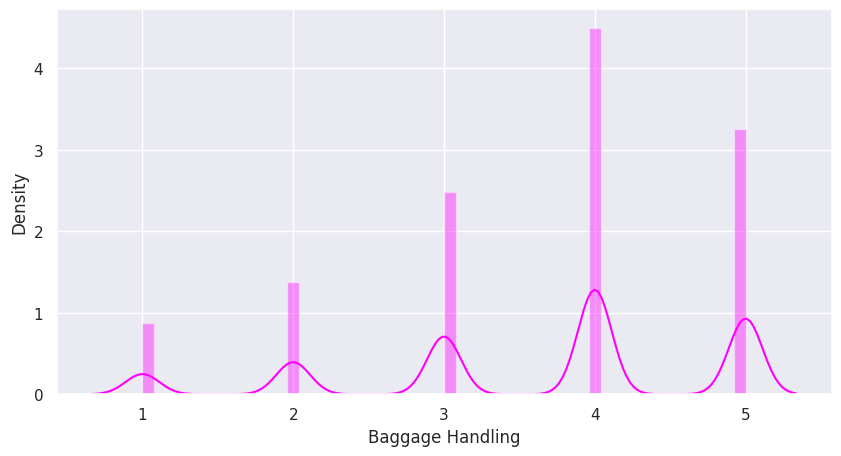

In [27]:
for i in discrete_features:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i],color='magenta')
  plt.xticks(rotation=360)
  plt.show()

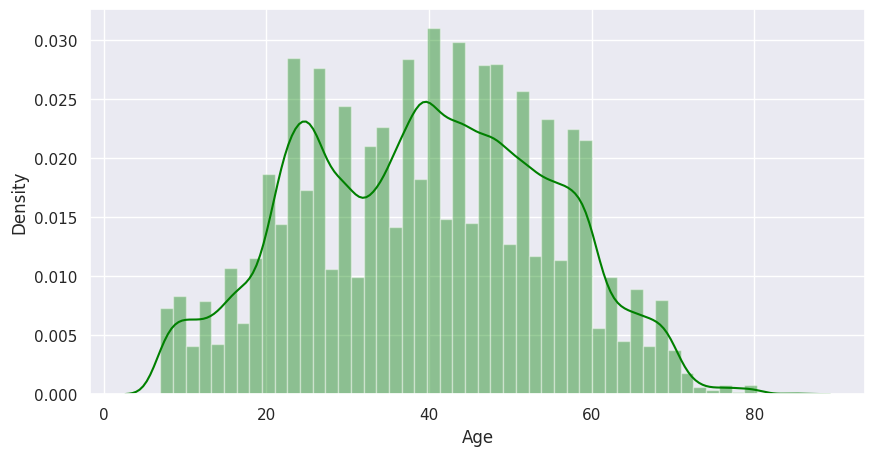

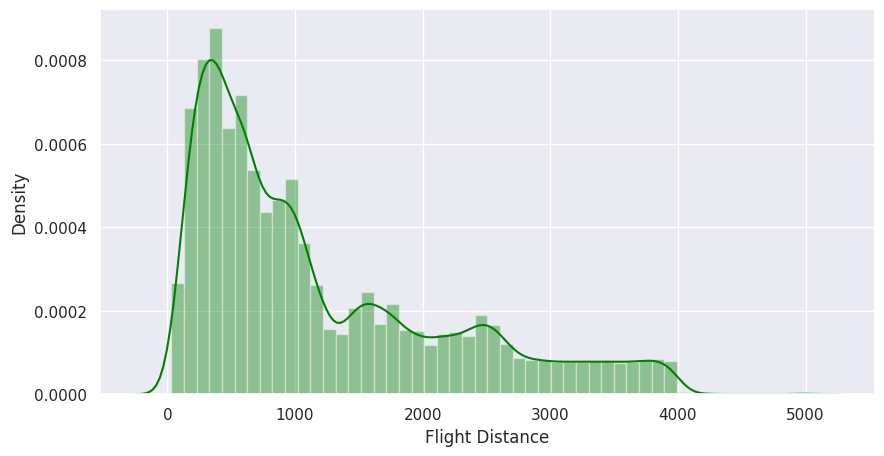

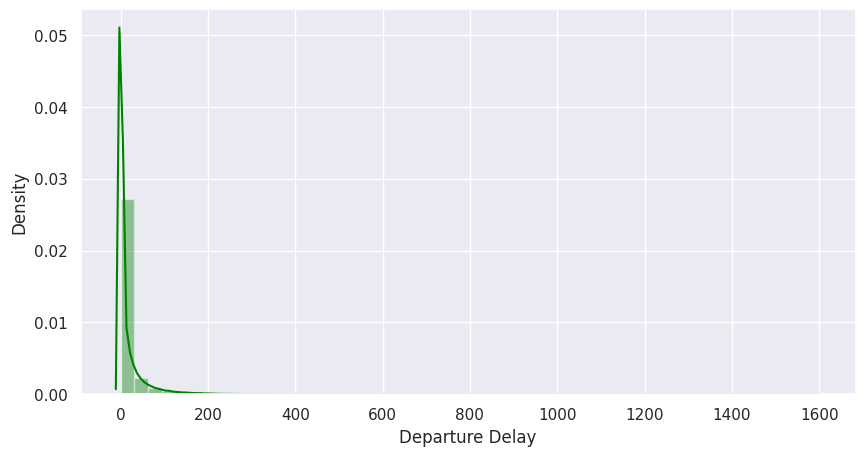

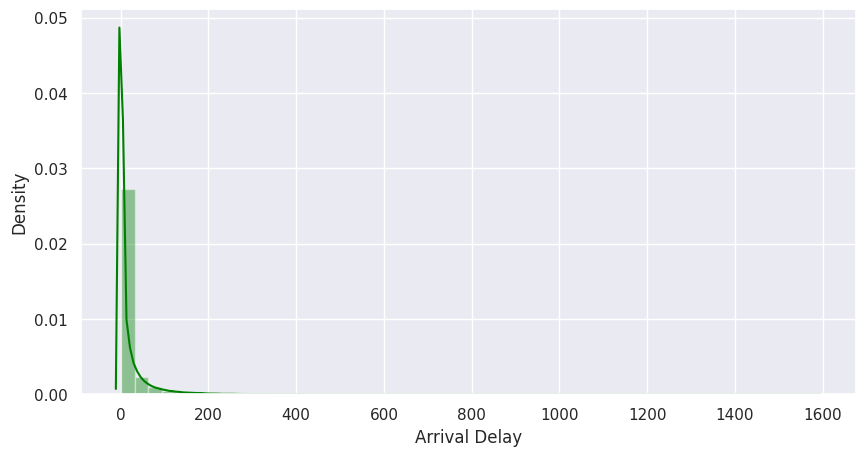

In [28]:
for i in continuous_features:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i],color='green')
  plt.xticks(rotation=360)
  plt.show()



1.for i in continuous_features:
2.   plt.figure(figsize=(10,5))
3.   sns.countplot(df[i],color='teal')
4.   plt.title(f'Count of {i}')
5.   plt.xticks(rotation=360)
6.   plt.show()








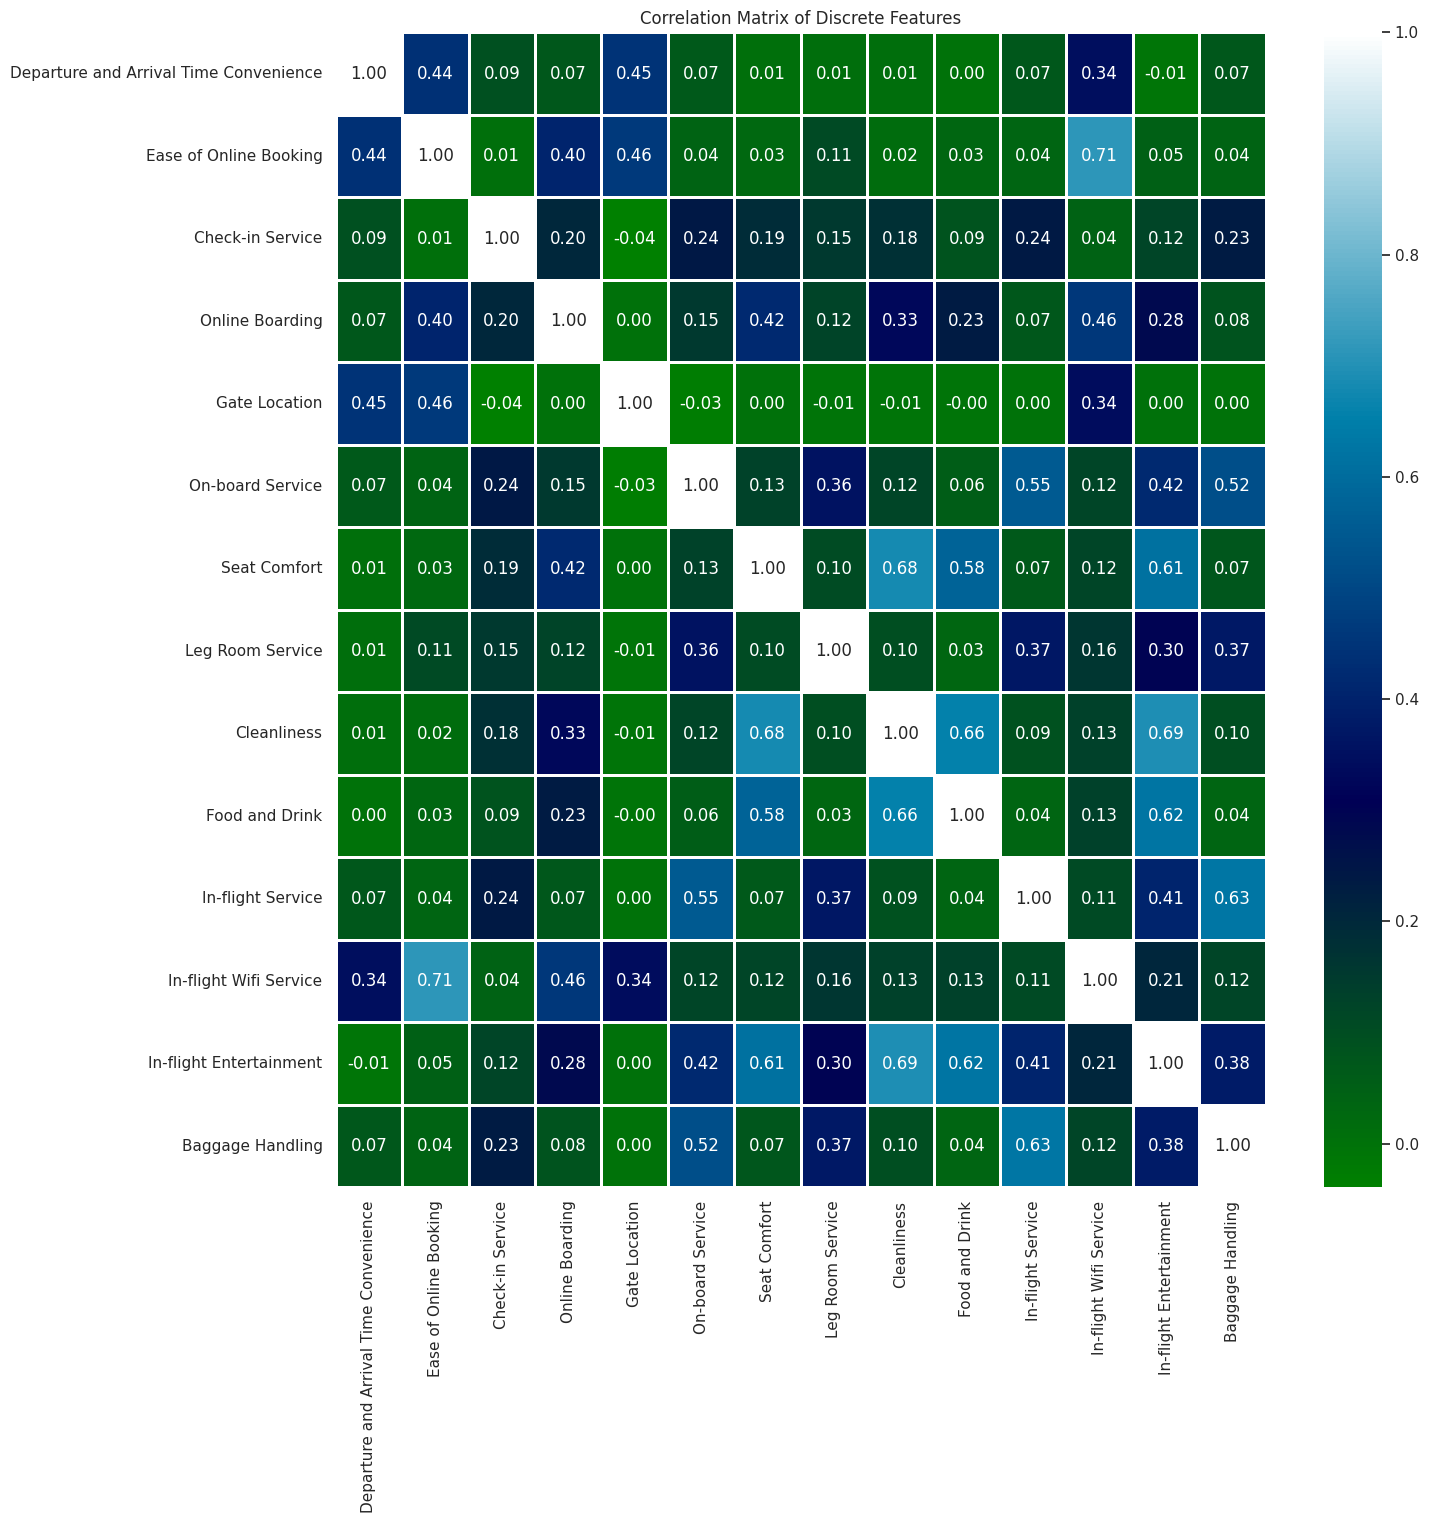

In [29]:
corr_matrix =df[discrete_features].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,cmap='ocean',fmt='.2f',linewidths=2)
plt.title('Correlation Matrix of Discrete Features')
plt.xticks(rotation=90)
plt.show()

In [30]:
corr_matrix

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Departure and Arrival Time Convenience,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833
Ease of Online Booking,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148
Check-in Service,0.091132,0.008819,1.000000,0.204238,-0.039353,0.244619,0.189979,0.152693,0.176658,0.085198,0.237601,0.043762,0.119554,0.234503
Online Boarding,0.072287,0.404866,0.204238,1.000000,0.002756,0.154242,0.419253,0.123225,0.329377,0.233500,0.074058,0.457445,0.283922,0.083541
Gate Location,0.447510,0.460041,-0.039353,0.002756,1.000000,-0.029019,0.002788,-0.005181,-0.005918,-0.002872,0.000310,0.338573,0.002741,0.000972
On-board Service,0.067297,0.039064,0.244619,0.154242,-0.029019,1.000000,0.130545,0.357721,0.122084,0.057404,0.551569,0.119928,0.418574,0.520296
Seat Comfort,0.008666,0.028561,0.189979,0.419253,0.002788,0.130545,1.000000,0.104272,0.679613,0.575846,0.068842,0.121513,0.611837,0.074620
Leg Room Service,0.010617,0.109450,0.152693,0.123225,-0.005181,0.357721,0.104272,1.000000,0.096695,0.033173,0.369569,0.160317,0.300397,0.371455
Cleanliness,0.009862,0.015125,0.176658,0.329377,-0.005918,0.122084,0.679613,0.096695,1.000000,0.658054,0.090356,0.131300,0.692511,0.097071
Food and Drink,0.000687,0.030514,0.085198,0.233500,-0.002872,0.057404,0.575846,0.033173,0.658054,1.000000,0.035210,0.132214,0.623461,0.035321


In [31]:
df=df.drop(['Cleanliness','Ease of Online Booking'],axis=1)

In [32]:
df_dummies = pd.get_dummies(df[categorical_features],drop_first=True).astype(int)
df_dummies.head()

,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,1,0,0,0,0,0
1,0,1,0,0,0,1
2,1,1,0,0,0,1
3,1,1,0,0,0,1
4,0,1,0,0,0,1


In [33]:
df=pd.concat([df.drop(columns=categorical_features),df_dummies],axis=1)
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,48,821,2,5.0,3,4,3,3,3,5,...,5,3,5,5,1,0,0,0,0,0
1,35,821,26,39.0,2,3,5,2,5,4,...,5,2,5,5,0,1,0,0,0,1
2,41,853,0,0.0,4,4,5,4,3,5,...,3,4,3,3,1,1,0,0,0,1
3,50,1905,0,0.0,2,3,4,2,5,5,...,5,2,5,5,1,1,0,0,0,1
4,49,3470,0,1.0,3,3,5,3,3,4,...,3,3,3,3,0,1,0,0,0,1


In [34]:
print(discrete_features)

['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


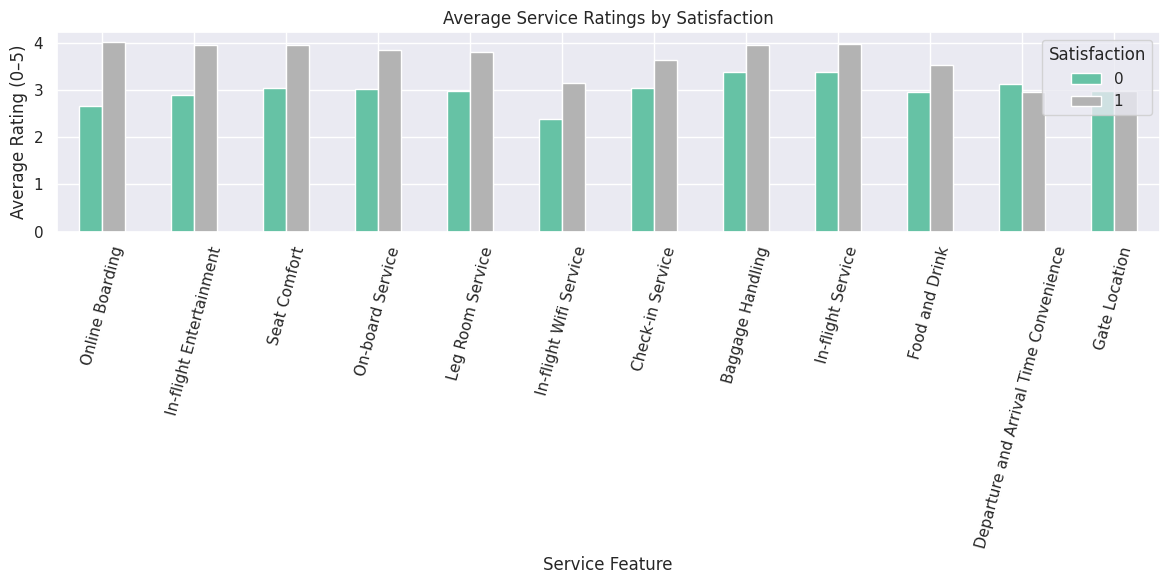

In [35]:


service_cols = ['Departure and Arrival Time Convenience', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',  'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


# Group by satisfaction and calculate mean ratings
mean_ratings = df.groupby('Satisfaction_Satisfied')[service_cols].mean().T

# Calculate the gap for sorting
mean_ratings['Gap'] = abs(mean_ratings.iloc[:, 0] - mean_ratings.iloc[:, 1])
mean_ratings_sorted = mean_ratings.sort_values(by='Gap', ascending=False)

# Plot
mean_ratings_sorted.drop(columns='Gap').plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Average Service Ratings by Satisfaction')
plt.ylabel('Average Rating (0–5)')
plt.xlabel('Service Feature')
plt.xticks(rotation=75)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


In [36]:

service_cols = ['Departure and Arrival Time Convenience', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',  'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


# Group by satisfaction and calculate mean ratings
mean_ratings = df.groupby('Satisfaction_Satisfied')[service_cols].mean().T

# Calculate gap in average ratings between satisfied (1) and dissatisfied (0)
mean_ratings['Gap'] = abs(mean_ratings[1] - mean_ratings[0])

# Sort by biggest gap
mean_ratings_sorted = mean_ratings.sort_values(by='Gap', ascending=False)
mean_ratings_sorted.reset_index().rename(columns={'index': 'Service Feature', 0: 'Dissatisfied Avg', 1: 'Satisfied Avg'})


Satisfaction_Satisfied,Service Feature,Dissatisfied Avg,Satisfied Avg,Gap
0,Online Boarding,2.658621,4.025856,1.367235
1,In-flight Entertainment,2.892433,3.964202,1.071769
2,Seat Comfort,3.037998,3.966417,0.928420
3,On-board Service,3.019537,3.856171,0.836634
4,Leg Room Service,2.990443,3.820054,0.829611
5,In-flight Wifi Service,2.398423,3.158609,0.760186
6,Check-in Service,3.042967,3.649004,0.606037
7,Baggage Handling,3.374912,3.966914,0.592002
8,In-flight Service,3.389601,3.970990,0.581388
9,Food and Drink,2.958422,3.525448,0.567027


In [37]:
service_cols = ['Departure and Arrival Time Convenience', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',  'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

# Calculate overall average (across all passengers)
overall_means = df[service_cols].mean().sort_values()

# Convert to DataFrame for easier viewing
pain_points = overall_means.reset_index()
pain_points.columns = ['Service Feature', 'Average Rating']
pain_points


,Service Feature,Average Rating
0,In-flight Wifi Service,2.728696
1,Gate Location,2.976925
2,Departure and Arrival Time Convenience,3.057599
3,Food and Drink,3.204774
4,Online Boarding,3.252633
5,Check-in Service,3.306267
6,Leg Room Service,3.350878
7,In-flight Entertainment,3.358077
8,On-board Service,3.383023
9,Seat Comfort,3.441361


In [38]:
!pip install squarify

In [39]:
import squarify

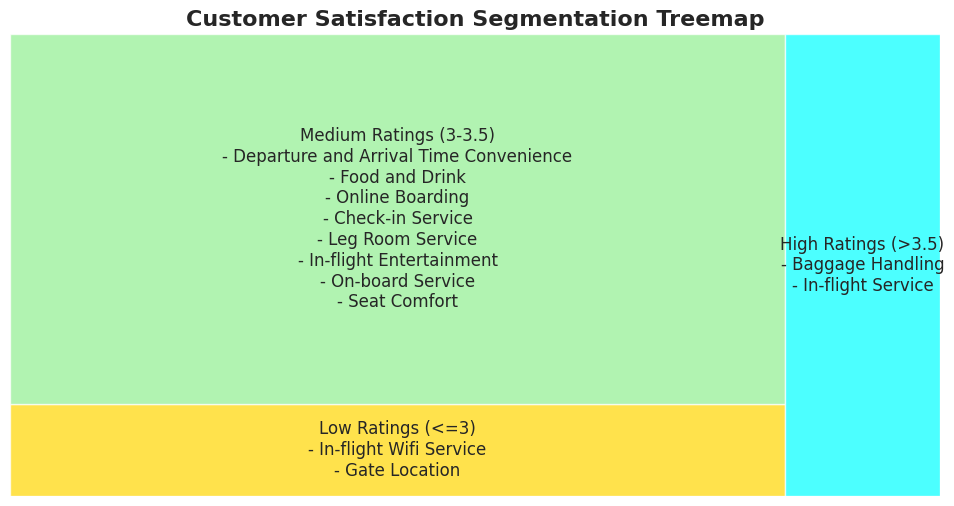

In [40]:
treemap_data  = {"Service Feature": ["In-flight Wifi Service", "Gate Location", "Departure and Arrival Time Convenience","Food and Drink", "Online Boarding", "Check-in Service", "Leg Room Service",
        "In-flight Entertainment", "On-board Service", "Seat Comfort", "Baggage Handling", "In-flight Service"],"Average Rating": [2.73, 2.98, 3.06, 3.20, 3.25, 3.31, 3.35, 3.36, 3.38, 3.44, 3.63, 3.64 ]}

df_treemap  = pd.DataFrame(treemap_data)

# Round ratings to nearest whole number
df_treemap["Rounded Rating"] = df_treemap["Average Rating"].round()

segments = {"Low Ratings (<=3)": df_treemap[df_treemap["Average Rating"] <= 3]["Service Feature"].tolist(),
            "Medium Ratings (3-3.5)": df_treemap[(df_treemap["Average Rating"] > 3) & (df_treemap["Average Rating"] <= 3.5)]["Service Feature"].tolist(),
            "High Ratings (>3.5)": df_treemap[df_treemap["Average Rating"] > 3.5]["Service Feature"].tolist()}

# Assign sizes based on counts in each category
sizes = [len(features) for features in segments.values()]
labels = [f"{key}\n" + "\n".join(f"- {feature}" for feature in features) for key, features in segments.items()]
colors = ["gold", "lightgreen", "cyan"]

# Create treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, text_kwargs={'fontsize': 12})
plt.axis("off")
plt.title("Customer Satisfaction Segmentation Treemap", fontsize=16, fontweight="bold")

# Show the plot
plt.show()

 1. Interaction: Class × Service Ratings → Satisfaction


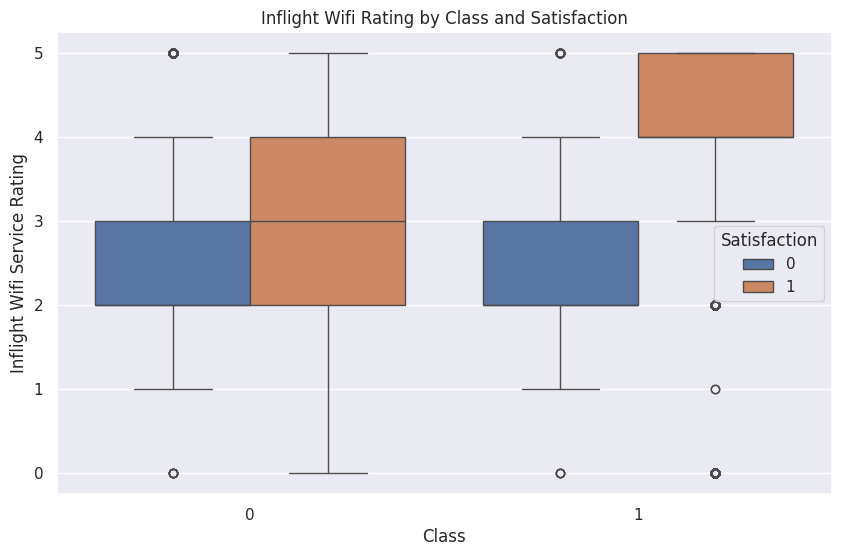

In [41]:
# if Inflight Wifi rating interacts with Class to affect Satisfaction
plt.figure(figsize=(10, 6))
# Use the original df for plotting interactions
sns.boxplot(data=df, x='Class_Economy', y='In-flight Wifi Service', hue='Satisfaction_Satisfied')
plt.title("Inflight Wifi Rating by Class and Satisfaction")
plt.ylabel("Inflight Wifi Service Rating")
plt.xlabel("Class")
plt.legend(title='Satisfaction')
plt.show()

2. Interaction: Travel Type × Delays → Satisfaction


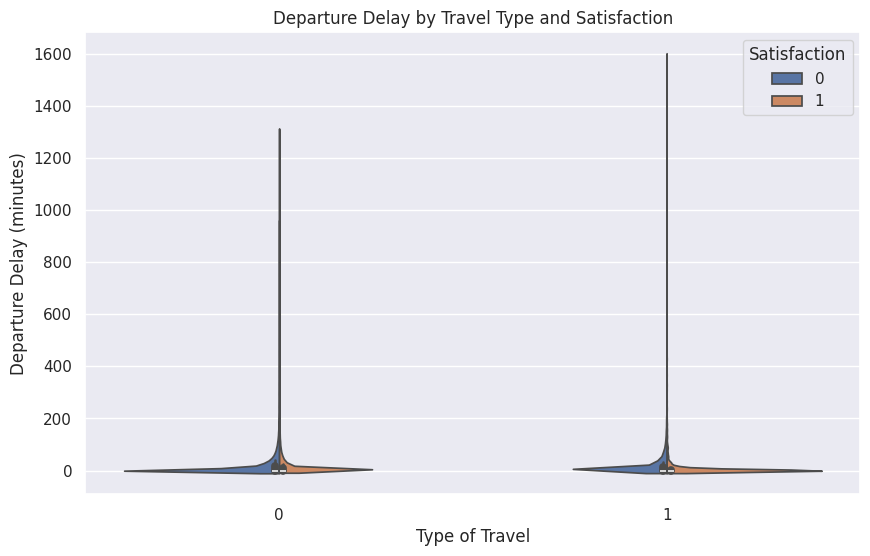

In [42]:
# Departure Delay vs Satisfaction by Travel Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Type of Travel_Personal', y='Departure Delay', hue='Satisfaction_Satisfied', split=True)
plt.title("Departure Delay by Travel Type and Satisfaction")
plt.ylabel("Departure Delay (minutes)")
plt.xlabel("Type of Travel")
plt.legend(title='Satisfaction')
plt.show()


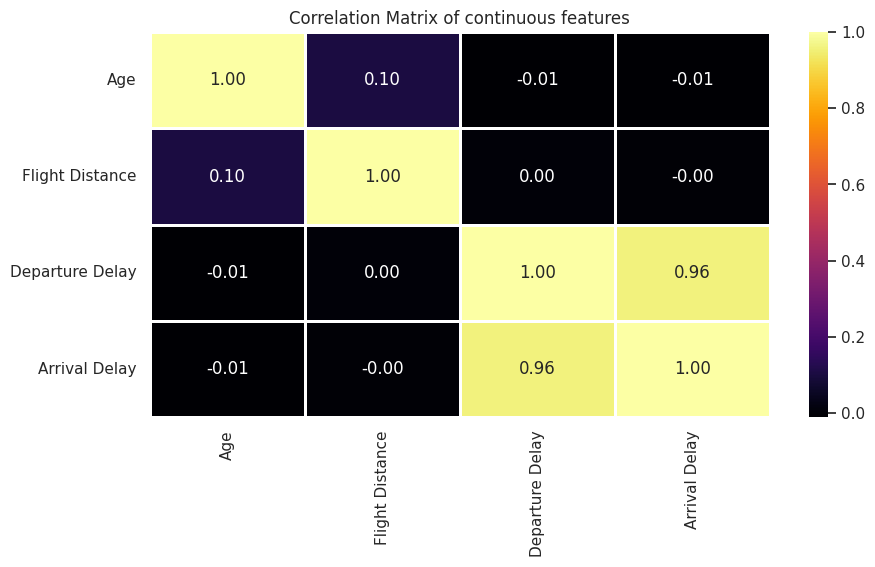

In [43]:
corr_matrix2 =df[continuous_features].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix2,annot=True,cmap='inferno',fmt='.2f',linewidths=2)
plt.title('Correlation Matrix of continuous features')
plt.xticks(rotation=90)
plt.show()

In [44]:
corr_matrix2

,Age,Flight Distance,Departure Delay,Arrival Delay
Age,1.000000,0.099466,-0.009041,-0.011206
Flight Distance,0.099466,1.000000,0.002391,-0.002001
Departure Delay,-0.009041,0.002391,1.000000,0.959382
Arrival Delay,-0.011206,-0.002001,0.959382,1.000000


In [45]:
df = df.drop(columns=['Departure Delay'])

In [46]:
print(continuous_features)

['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']


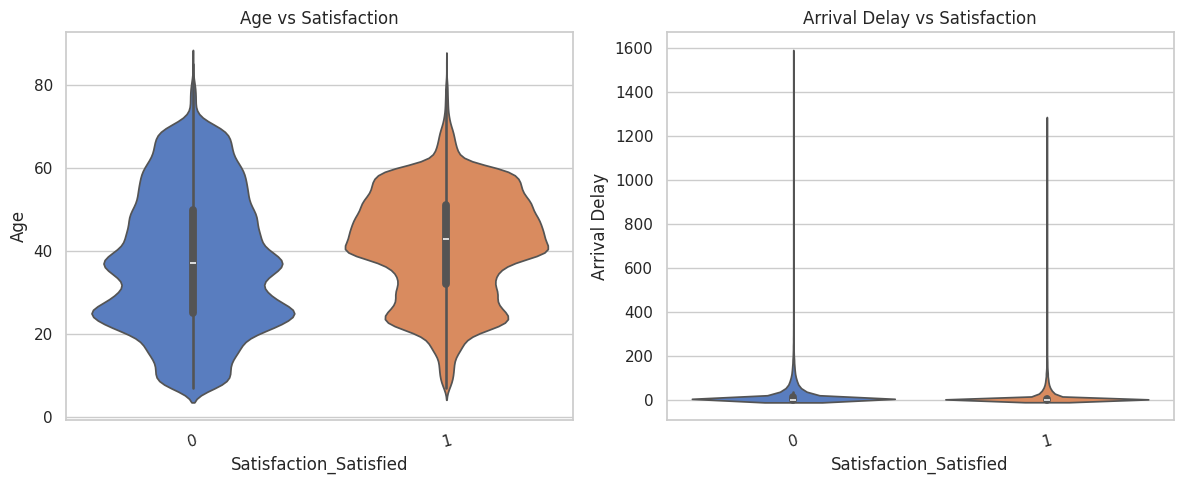

In [48]:


# Select continuous features and satisfaction column
features = ['Age', 'Arrival Delay']
satisfaction_col = 'Satisfaction_Satisfied'

# Set up the plot style
sns.set(style="whitegrid")

# Create plots
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x=satisfaction_col, y=feature, data=df, palette="muted", inner='box')
    plt.title(f'{feature} vs Satisfaction')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


In [49]:
print(categorical_features)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


In [50]:
from scipy.stats import f_oneway

# Filter the DataFrame using boolean indexing for each column separately
# Use bitwise operator '&' instead of 'and' for element-wise comparison
group1 = df[
    (df['Gender_Male'] == 1) &
    (df['Customer Type_Returning'] == 1) &
    (df['Type of Travel_Personal'] == 1) &
    (df['Class_Economy'] == 1)
]['Satisfaction_Satisfied']

group2 = df[
    (df['Gender_Male'] == 0) &
    (df['Customer Type_Returning'] == 0) &
    (df['Type of Travel_Personal'] == 0) &
    (df['Class_Economy'] == 0)
]['Satisfaction_Satisfied']

# Perform the ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print('F-statistic:', f_stat)
print('p-value:', p_val)

F-statistic: 2099.8432613772
p-value: 0.0


In [51]:
print(f"Mean satisfaction for group1: {group1.mean()}")
print(f"Mean satisfaction for group2: {group2.mean()}")

Mean satisfaction for group1: 0.10054231917616233
Mean satisfaction for group2: 0.35327375524347987


In [52]:
df['Satisfaction_Satisfied'].value_counts()

,count
Satisfaction_Satisfied,
0,73452
1,56428


In [53]:
!pip install pycaret

In [54]:
data=df.sample(frac=0.80,random_state=42).reset_index(drop=True)
data_unseen=df.drop(data.index).reset_index(drop=True)

In [55]:
print(data.shape,data_unseen.shape)

(103904, 21) (25976, 21)


In [56]:
from pycaret.classification import *

In [57]:
classification_model=(setup(data=data,target='Satisfaction_Satisfied',session_id=42))

,Description,Value
0,Session id,42
1,Target,Satisfaction_Satisfied
2,Target type,Binary
3,Original data shape,"(103904, 21)"
4,Transformed data shape,"(103904, 21)"
5,Transformed train set shape,"(72732, 21)"
6,Transformed test set shape,"(31172, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [58]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9619,0.9944,0.9387,0.9727,0.9554,0.9221,0.9226,3.2760
xgboost,Extreme Gradient Boosting,0.9616,0.9945,0.9418,0.9692,0.9553,0.9217,0.9220,1.7700
rf,Random Forest Classifier,0.9600,0.9932,0.9373,0.9698,0.9533,0.9184,0.9188,7.8100
et,Extra Trees Classifier,0.9597,0.9925,0.9364,0.9700,0.9529,0.9177,0.9182,6.8810
dt,Decision Tree Classifier,0.9425,0.9417,0.9353,0.9327,0.9340,0.8831,0.8831,0.4000
gbc,Gradient Boosting Classifier,0.9406,0.9870,0.9169,0.9449,0.9307,0.8787,0.8791,9.3350
ada,Ada Boost Classifier,0.9274,0.9772,0.9062,0.9252,0.9156,0.8519,0.8520,2.3880
ridge,Ridge Classifier,0.8695,0.9243,0.8378,0.8588,0.8481,0.7338,0.7340,0.1270
lda,Linear Discriminant Analysis,0.8694,0.9243,0.8378,0.8584,0.8480,0.7335,0.7337,0.2120
lr,Logistic Regression,0.8641,0.9206,0.8382,0.8477,0.8429,0.7232,0.7233,6.2120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [59]:
lightgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9944,0.9390,0.9779,0.9581,0.9269,0.9275
1,0.9649,0.9955,0.9428,0.9758,0.9590,0.9284,0.9288
2,0.9637,0.9948,0.9425,0.9732,0.9576,0.9259,0.9262
3,0.9592,0.9933,0.9346,0.9705,0.9522,0.9166,0.9171
4,0.9616,0.9942,0.9390,0.9719,0.9551,0.9216,0.9221
5,0.9622,0.9946,0.9399,0.9722,0.9558,0.9228,0.9232
6,0.9604,0.9944,0.9387,0.9693,0.9537,0.9191,0.9195
7,0.9633,0.9948,0.9421,0.9726,0.9571,0.9250,0.9254
8,0.9590,0.9936,0.9327,0.9720,0.9519,0.9162,0.9168


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
#tuned_lightgbm=tune_model(lightgbm)

In [64]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from pycaret.classification import tune_model


lgbm = LGBMClassifier()

# Smaller CV
cv = KFold(n_splits=5)

# Tune with parallel jobs
tuned_lgbm = tune_model(
    lgbm,
    fold=cv,
    custom_grid={
        'num_leaves': [31, 63],
        'learning_rate': [0.01, 0.05],
        'max_depth': [5, 7]})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9581,0.9931,0.9321,0.9717,0.9515,0.9146,0.9152
1,0.9550,0.9918,0.9317,0.9639,0.9476,0.9082,0.9086
2,0.9539,0.9920,0.9313,0.9607,0.9457,0.9057,0.9061
3,0.9557,0.9926,0.9315,0.9633,0.9471,0.9091,0.9094
4,0.9520,0.9913,0.9265,0.9632,0.9445,0.9023,0.9028
Mean,0.9550,0.9922,0.9306,0.9646,0.9473,0.9080,0.9084
Std,0.0020,0.0006,0.0021,0.0038,0.0024,0.0041,0.0041


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


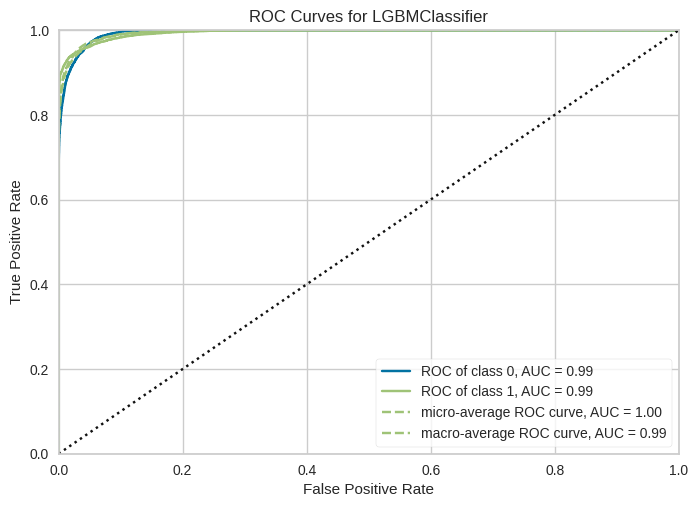

In [65]:
plot_model(lightgbm,plot='auc')

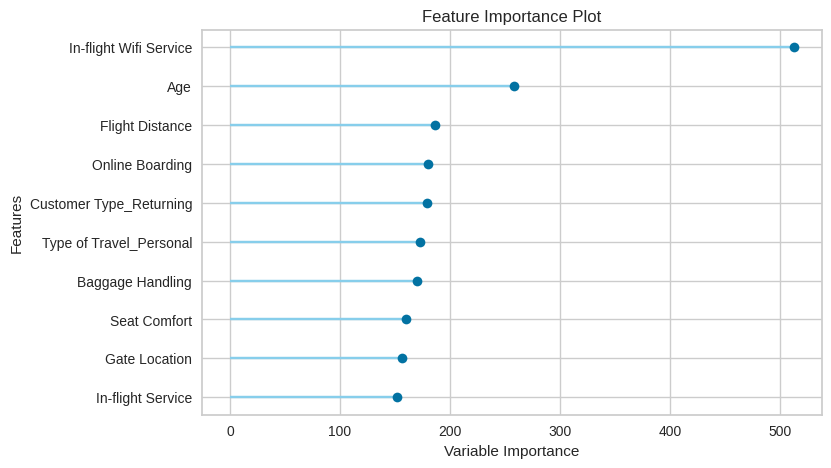

In [66]:
plot_model(lightgbm,plot='feature')

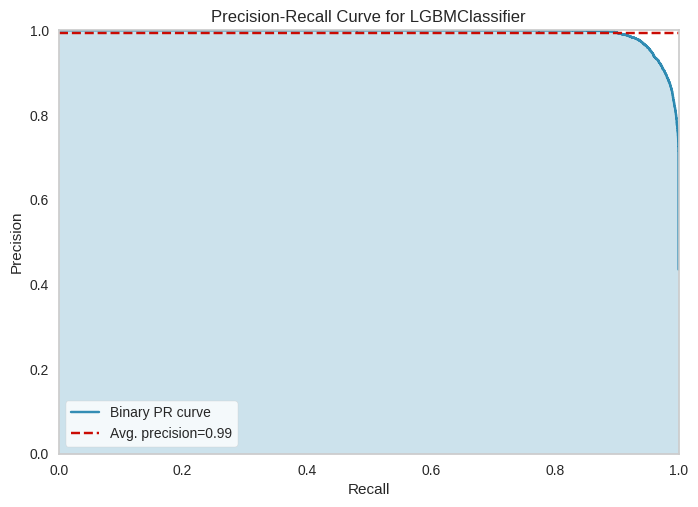

In [67]:
plot_model(lightgbm,plot='pr')

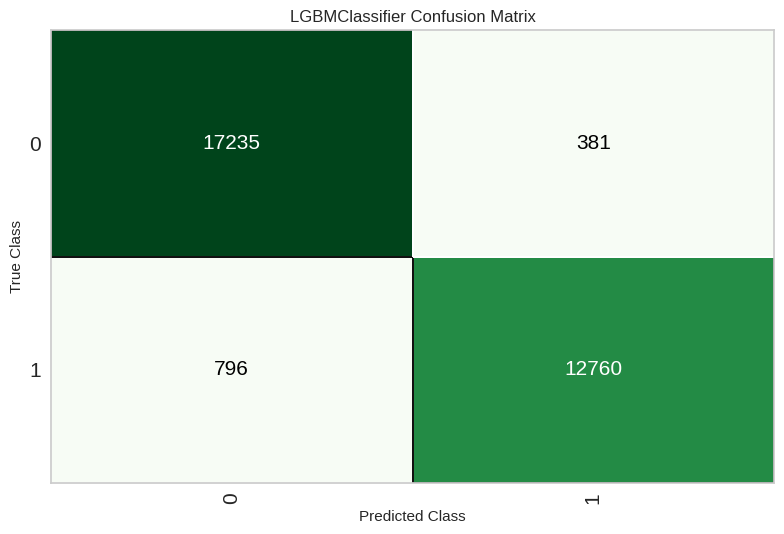

In [68]:
plot_model(lightgbm,plot='confusion_matrix')

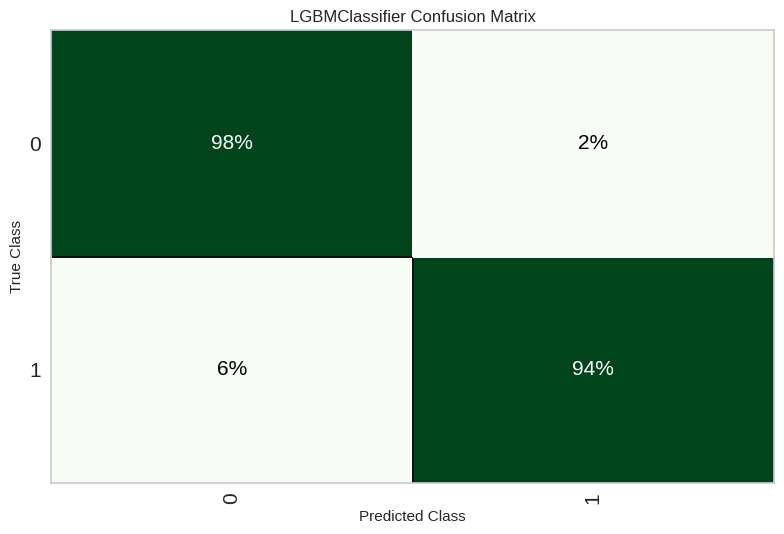

In [69]:
plot_model(lightgbm, plot='confusion_matrix', plot_kwargs={'percent': True})

In [70]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [71]:
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9622,0.9945,0.9413,0.9710,0.9559,0.9229,0.9232


,Age,Flight Distance,Arrival Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,...,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied,prediction_label,prediction_score
58484,42,3211,0.0,3,4,5,1,1,3,1,...,1,1,0,1,0,0,0,1,1,0.9994
32754,36,771,14.0,2,3,2,1,4,3,3,...,3,2,0,0,0,1,0,0,0,0.9953
66441,56,188,175.0,3,1,4,3,2,1,3,...,2,3,1,1,0,0,0,0,0,0.8093
43283,40,2296,5.0,5,5,5,5,3,4,3,...,3,3,1,1,0,0,0,1,1,0.9993
81047,40,1337,0.0,5,3,5,5,4,5,4,...,4,4,0,1,0,0,0,1,1,0.9989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39395,55,2324,0.0,4,4,4,4,5,4,5,...,5,5,1,1,0,0,0,1,1,0.9958
10324,25,406,7.0,4,3,2,3,4,4,5,...,2,4,0,1,1,1,0,0,0,0.9977
68666,25,1471,0.0,5,4,4,5,5,4,2,...,4,5,0,1,0,0,0,1,1,0.9961
19137,49,1205,0.0,2,5,2,2,5,4,4,...,4,5,0,0,0,0,0,0,0,0.8353


In [72]:
unseen_predict=predict_model(lightgbm,data=data_unseen)
unseen_predict.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9695,0.9963,0.9574,0.9727,0.9650,0.9380,0.9381


,Age,Flight Distance,Arrival Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,...,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied,prediction_label,prediction_score
0,77,869,0.0,5,1,4,5,4,3,4,...,4,4,0,1,0,0,1,0,0,0.7748
1,46,533,15.0,1,5,5,1,4,5,4,...,4,4,1,1,0,0,0,1,1,0.9989
2,37,770,17.0,1,3,1,3,4,4,1,...,4,2,1,0,0,0,0,0,0,0.9977
3,51,2392,38.0,3,1,4,3,4,3,4,...,4,4,1,1,0,0,0,0,0,0.8684
4,51,133,66.0,5,5,4,5,5,5,5,...,5,5,0,1,0,0,0,1,1,0.9994


In [73]:
save_model(lightgbm,'LGBM_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Flight Distance',
                                              'Arrival Delay',
                                              'Departure and Arrival Time '
                                              'Convenience',
                                              'Check-in Service',
                                              'Online Boarding', 'Gate Location',
                                              'On-board Service', 'Seat Comfort',
                                              'Leg Room Service',
                                              'Food and Drink',
                                              'In-flight Service',
                                              'In-flight Wifi Service',
                                              'In-flight...
                  LGBMClassifier(boosti